# Laboratorio 2

### Presentado por: Santiago Restrepo Rojas

In [ ]:
pip install -U fortran-magic setuptools==61.3.0

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00',
                             '2017-01-07 00:00:00+00:00',
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: unhashable type: 'slice'

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
4 * "a"

'aaaa'

In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 40 µs, sys: 0 ns, total: 40 µs
Wall time: 44.6 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2199.998
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4399.99
clflush size	: 64
cache_alignment	: 64
ad

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            # $ len(A[0]) is the number of columns of A
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
# $ In this case len(B) is not equal to len(A[0]) so the matrices are not compatible for multiplication
matmul(a,b)

IndexError: list index out of range

**My own example 3 - Chekcing the matrix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    # $ Checking if the matrices are compatible for multiplication
    # $ len(A[0]) is the number of columns of A
    # $ len(B) is the number of rows of B
    # $ If len(A[0]) is not equal to len(B) then the matrices are not compatible for multiplication

    if len(A[0]) != len(B):
        raise ValueError("Matrix A and B are not compatible for multiplication")
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]

    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(A[0])):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
# $ In this case len(A[0]) is not equal to len(B) so the matrices are not compatible for multiplication
matmul(a,b)

ValueError: Matrix A and B are not compatible for multiplication

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
# $Defining A and B that are compatible for multiplication
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]
b = [[1, 2, 3, 4],
     [2, 3, 4, 5],
     [1, 1, 1, 1]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
# $ Running the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.
matmul(a,b)

[[8, 11, 14, 17], [12, 17, 22, 27], [24, 35, 46, 57], [4, 6, 8, 10]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

0.4399759014287467

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.98032376332983, 0.7178148945887194, 0.18456130328095155],
 [0.4795140185567177, 0.4503782984783127, 0.739071440550889]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

Execution time statistics:
Average: 10.2177 seconds
Variance: 1.1598 seconds²
Standard deviation: 1.0769 seconds


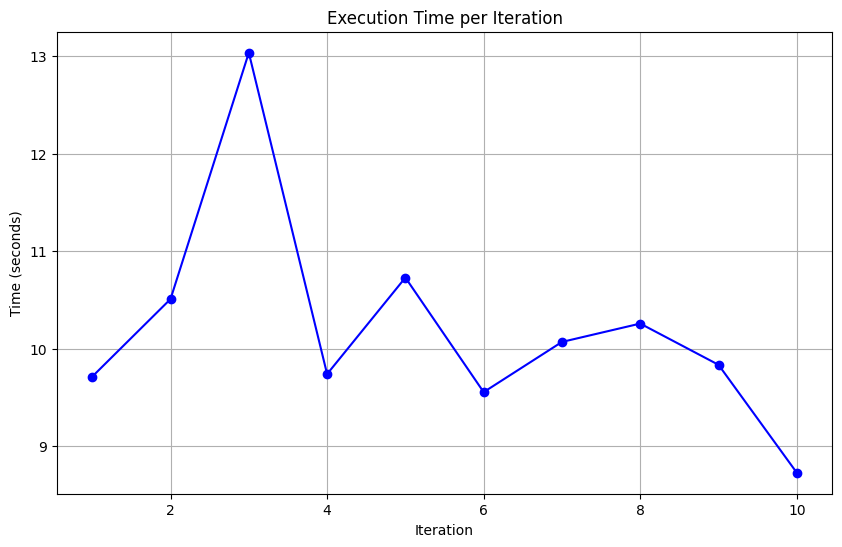

In [ ]:
import time
# $ List of execution times
times = []

# $ Running 10 times

for i in range(10):
    start = time.time()

    a = random_matrix(600, 100)
    b = random_matrix(100, 600)
    matmul(a,b)

    end = time.time()
    total_time = end - start
    times.append(total_time)

# $ Calculate statistics
average_execution_time_python = np.mean(times)
variance = np.var(times)
standard_deviation = np.std(times)

# $ Create a graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11), times, 'bo-')
plt.title('Execution Time per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.grid(True)

# $ Print statistics
print(f"Execution time statistics:")
print(f"Average: {average_execution_time_python:.4f} seconds")
print(f"Variance: {variance:.4f} seconds²")
print(f"Standard deviation: {standard_deviation:.4f} seconds")

**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
average_execution_time_data_frame = pd.DataFrame({'Language': ['Python'], 'Average Execution Time': [average_execution_time_python]})
average_execution_time_data_frame

,Language,Average Execution Time
0,Python,10.217706


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

Execution time statistics:
Average: 0.0464 seconds
Variance: 0.0000 seconds²
Standard deviation: 0.0059 seconds


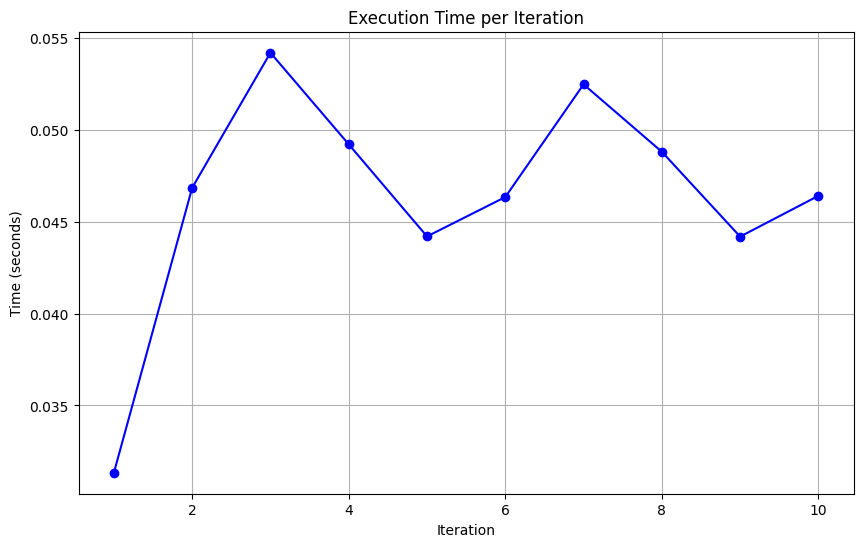

In [ ]:
# $ We define the function numpy_dot_product(xs, ys) that multiplies two NumPy arrays elementwise
def numpy_dot_product(xs, ys):
    a = np.array(xs)
    b = np.array(ys)
    return  np.dot(a,b)

# $ List of execution times
times = []


# $ Running 10 times
for i in range(10):
    start = time.time()
    randa = random_matrix(600, 100)
    randb = random_matrix(100, 600)
    result = numpy_dot_product(randa, randb)
    end = time.time()
    total_time = end - start
    times.append(total_time)

average_execution_time_numpy = np.mean(times)
variance = np.var(times)
standard_deviation = np.std(times)

# $ Create a graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11), times, 'bo-')
plt.title('Execution Time per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.grid(True)

# $ Print statistics
print(f"Execution time statistics:")
print(f"Average: {average_execution_time_numpy:.4f} seconds")
print(f"Variance: {variance:.4f} seconds²")
print(f"Standard deviation: {standard_deviation:.4f} seconds")

# $ Adding NumPy's average execution time to the data frame
new_row = pd.DataFrame({'Language': ['NumPy'], 'Average Execution Time': [average_execution_time_numpy]})
average_execution_time_data_frame = pd.concat([average_execution_time_data_frame, new_row], ignore_index=True)

In [ ]:
average_execution_time_data_frame

,Language,Average Execution Time
0,Python,10.217706
1,NumPy,0.046404


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result

    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 16.2 ms, sys: 3 µs, total: 16.2 ms
Wall time: 17.4 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 206 µs, sys: 0 ns, total: 206 µs
Wall time: 214 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
a = [[1, 2],
     [3, 4]]
b = [[5, 6],
     [7, 8]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
!rm -rf ~/.cache/ipython/fortranmagic
%fortran_config --clean-cache

Clean cache: /root/.cache/ipython/fortranmagic/deeac018


In [ ]:
%%fortran
subroutine fortran_matmul(A, B, C)
    double precision, intent(in) :: A(:,:)
    double precision, intent(in) :: B(:,:)
    double precision, intent(out) :: C(size(A,1), size(B,2))
    integer :: rows_A, cols_A, rows_B, cols_B
    integer :: i, j, k

    ! Get the dimensions of matrices A and B
    rows_A = size(A, 1)
    cols_A = size(A, 2)
    rows_B = size(B, 1)
    cols_B = size(B, 2)

    ! Check if matrices are compatible for multiplication
    if (cols_A /= rows_B) then
        print *, "Error: Matrices A and B are not compatible for multiplication."
        stop
    end if


    ! Perform matrix multiplication
    do i = 1, rows_A
        do j = 1, cols_B
            do k = 1, cols_A
                C(i, j) = C(i, j) + A(i, k) * B(k, j)
            end do
        end do
    end do
end subroutine fortran_matmul

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
%time
fortran_matmul(a,b)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.48 µs


array([[19., 22.],
       [43., 50.]])

**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
# $ The function defined above is used for any matrices with dimensions compatible for multiplication

**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:
a = random_matrix(600, 100)
b = random_matrix(100, 600)

fortran_matmul(a,b)

array([[23.85221359, 26.6031772 , 24.98797955, ..., 23.30928568,
        23.06303732, 25.49655512],
       [21.50244856, 26.6392104 , 23.23084628, ..., 21.77708557,
        22.26206071, 23.14991317],
       [23.35794266, 27.16704681, 24.27167228, ..., 24.18730844,
        22.30168457, 24.80698402],
       ...,
       [23.18709492, 26.03652212, 23.77370576, ..., 22.87507218,
        20.97985042, 22.19910954],
       [21.97068631, 26.47393324, 20.68201831, ..., 22.68806575,
        20.53962513, 21.8229929 ],
       [20.66641538, 24.56862907, 21.00684334, ..., 21.82767605,
        20.85497821, 21.1066935 ]])

**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

Execution time statistics:
Average: 0.0884 seconds
Variance: 0.0004 seconds²
Standard deviation: 0.0188 seconds


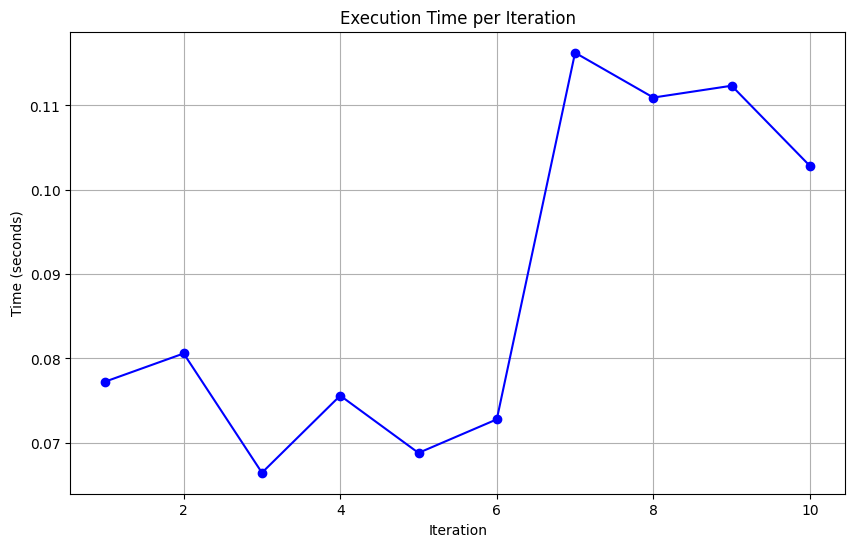

In [ ]:
# $ List of execution times
times = []


# $ Running 10 times
for i in range(10):
    start = time.time()
    a = random_matrix(600, 100)
    b = random_matrix(100, 600)
    result = fortran_matmul(a, b)
    end = time.time()
    total_time = end - start
    times.append(total_time)

average_execution_time_fortran_magic = np.mean(times)
variance = np.var(times)
standard_deviation = np.std(times)

# $ Create a graph
plt.figure(figsize=(10,6))
plt.plot(range(1,11), times, 'bo-')
plt.title('Execution Time per Iteration')
plt.xlabel('Iteration')
plt.ylabel('Time (seconds)')
plt.grid(True)

# $ Print statistics
print(f"Execution time statistics:")
print(f"Average: {average_execution_time_fortran_magic:.4f} seconds")
print(f"Variance: {variance:.4f} seconds²")
print(f"Standard deviation: {standard_deviation:.4f} seconds")

# $ Adding NumPy's average execution time to the data frame
new_row = pd.DataFrame({'Language': ['Fortran Magic'], 'Average Execution Time': [average_execution_time_fortran_magic]})
average_execution_time_data_frame = pd.concat([average_execution_time_data_frame, new_row], ignore_index=True)

**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
# $ install fortran compiler

# For Ubuntu
!apt-get install -y gfortran

# For Fedora ( My Case )
# !dnf install -y gcc-gfortran

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
gfortran is already the newest version (4:11.2.0-1ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
%%writefile matrix_multiplication_test.f90
program matrix_multiplication_test
    implicit none
    double precision, allocatable :: A(:,:), B(:,:), C(:,:)
    integer :: rows_A, cols_A, rows_B, cols_B
    integer :: i

    ! Set dimensions for matrices A and B
    rows_A = 600
    cols_A = 100
    rows_B = 100
    cols_B = 600

    ! Allocate matrices
    allocate(A(rows_A, cols_A))
    allocate(B(rows_B, cols_B))
    allocate(C(rows_A, cols_B))


    ! Perform matrix multiplication 10 times
    do i = 1, 10
        ! Initialize matrices A and B with random values in the range [0, 1)
        call random_number(A)
        call random_number(B)
        call fortran_matmul(A, B, C)
    end do

    ! Deallocate matrices A and B
    deallocate(A)
    deallocate(B)
contains

    subroutine fortran_matmul(A, B, C)
        double precision, intent(in) :: A(:,:), B(:,:)
        double precision, intent(out) :: C(size(A,1), size(B,2))
        integer :: i, j, k

        ! Perform matrix multiplication
        C = 0.0d0  ! Initialize output matrix to zero
        do i = 1, size(A, 1)
            do j = 1, size(B, 2)
                do k = 1, size(A, 2)
                    C(i, j) = C(i, j) + A(i, k) * B(k, j)
                end do
            end do
        end do
    end subroutine fortran_matmul

end program matrix_multiplication_test

Writing matrix_multiplication_test.f90


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
start_time = time.time()

!gfortran matrix_multiplication_test.f90 -o matrix_multiplication_test

start_time = time.time()
!./matrix_multiplication_test
end_time = time.time()

average_execution_time_fortran = (end_time - start_time) / 10
print("Average execution time over 10 runs:", average_execution_time_fortran, "seconds")

Average execution time over 10 runs: 0.49457826614379885 seconds


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
# $ Adding NumPy's average execution time to the data frame
new_row = pd.DataFrame({'Language': ['Fortran'], 'Average Execution Time': [average_execution_time_fortran]})
average_execution_time_data_frame = pd.concat([average_execution_time_data_frame, new_row], ignore_index=True)
average_execution_time_data_frame

,Language,Average Execution Time
0,Python,10.217706
1,NumPy,0.046404
2,Fortran Magic,0.088384
3,Fortran,0.494578


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
# $ Install C compiler on Ubuntu
!apt-get update && apt-get install -y gcc

# $ Install C compiler on Fedora ( My Case )
# !dnf install -y gcc

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,275 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,613 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd

In [ ]:
%%writefile matrix_multiplication_test_in_c.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

void initialize_matrix(double *matrix, int rows, int cols) {
    for (int i = 0; i < rows; i++) {
        for (int j = 0; j < cols; j++) {
            matrix[i * cols + j] = (double)rand() / RAND_MAX;
        }
    }
}

void matrix_multiply(double *A, double *B, double *C, int rows_A, int cols_A, int cols_B) {
    for (int i = 0; i < rows_A; i++) {
        for (int j = 0; j < cols_B; j++) {
            C[i * cols_B + j] = 0.0;
            for (int k = 0; k < cols_A; k++) {
                C[i * cols_B + j] += A[i * cols_A + k] * B[k * cols_B + j];
            }
        }
    }
}

int main() {
    int rows_A = 600, cols_A = 100;
    int rows_B = 100, cols_B = 600;

    double *A = (double *)malloc(rows_A * cols_A * sizeof(double));
    double *B = (double *)malloc(rows_B * cols_B * sizeof(double));
    double *C = (double *)malloc(rows_A * cols_B * sizeof(double));

    // Initialize matrices with random values
    srand(time(NULL));

    // Perform matrix multiplication 10 times
    for (int i = 0; i < 10; i++) {
        initialize_matrix(A, rows_A, cols_A);
        initialize_matrix(B, rows_B, cols_B);
        matrix_multiply(A, B, C, rows_A, cols_A, cols_B);
    }

    // Free allocated memory
    free(A);
    free(B);
    free(C);

    return 0;
}

Writing matrix_multiplication_test_in_c.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!gcc matrix_multiplication_test_in_c.c -o matrix_multiplication_test_in_c

start_time = time.time()
!./matrix_multiplication_test_in_c
end_time = time.time()

average_execution_time_c= (end_time - start_time) / 10
print("Average execution time over 10 runs:", average_execution_time_c, "seconds")

Average execution time over 10 runs: 0.3921038627624512 seconds


**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
# $ Adding C average execution time to the data frame
new_row = pd.DataFrame({'Language': ['C'], 'Average Execution Time': [average_execution_time_c]})
average_execution_time_data_frame = pd.concat([average_execution_time_data_frame, new_row], ignore_index=True)
average_execution_time_data_frame

,Language,Average Execution Time
0,Python,10.217706
1,NumPy,0.046404
2,Fortran Magic,0.088384
3,Fortran,0.494578
4,C,0.392104


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
# $ Install C++ compiler on Ubuntu
!apt-get update && apt-get install -y g++

# $ Install C++ compiler on Fedora ( My Case )
# !dnf install -y gcc-c++

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
%%writefile matrix_multiplication_test_in_cpp.cpp
#include <iostream>
#include <vector>
#include <cstdlib>
#include <ctime>

void initialize_matrix(std::vector<std::vector<double>> &matrix, int rows, int cols) {
    for (int i = 0; i < rows; ++i) {
        for (int j = 0; j < cols; ++j) {
            matrix[i][j] = static_cast<double>(rand()) / RAND_MAX;
        }
    }
}

void matrix_multiply(const std::vector<std::vector<double>> &A,
                     const std::vector<std::vector<double>> &B,
                     std::vector<std::vector<double>> &C,
                     int rows_A, int cols_A, int cols_B) {
    for (int i = 0; i < rows_A; ++i) {
        for (int j = 0; j < cols_B; ++j) {
            C[i][j] = 0.0;
            for (int k = 0; k < cols_A; ++k) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    int rows_A = 600, cols_A = 100;
    int rows_B = 100, cols_B = 600;

    std::vector<std::vector<double>> A(rows_A, std::vector<double>(cols_A));
    std::vector<std::vector<double>> B(rows_B, std::vector<double>(cols_B));
    std::vector<std::vector<double>> C(rows_A, std::vector<double>(cols_B));

    // Initialize matrices with random values
    srand(static_cast<unsigned>(time(0)));

    // Perform matrix multiplication 10 times
    for (int i = 0; i < 10; ++i) {
        initialize_matrix(A, rows_A, cols_A);
        initialize_matrix(B, rows_B, cols_B);
        matrix_multiply(A, B, C, rows_A, cols_A, cols_B);
    }

    return 0;
}

Writing matrix_multiplication_test_in_cpp.cpp


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!g++ matrix_multiplication_test_in_cpp.cpp -o matrix_multiplication_test_in_cpp

start_time = time.time()
!./matrix_multiplication_test_in_cpp
end_time = time.time()

average_execution_time_cpp = (end_time - start_time) / 10
print("Average execution time over 10 runs:", average_execution_time_cpp, "seconds")

Average execution time over 10 runs: 0.75380539894104 seconds


**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
# $ Adding C++ average execution time to the data frame
new_row = pd.DataFrame({'Language': ['C++'], 'Average Execution Time': [average_execution_time_cpp]})
average_execution_time_data_frame = pd.concat([average_execution_time_data_frame, new_row], ignore_index=True)
average_execution_time_data_frame

,Language,Average Execution Time
0,Python,10.217706
1,NumPy,0.046404
2,Fortran Magic,0.088384
3,Fortran,0.494578
4,C,0.392104
5,C++,0.753805


**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
# $ Install Java compiler on Ubuntu
!apt-get update && apt-get install -y openjdk-11-jdk

# $ Install Java compiler on Fedora ( My Case )
# !dnf install -y java-11-openjdk-devel

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
%%writefile matrix_multiplication_test_in_java.java
import java.util.Random;

public class matrix_multiplication_test_in_java {

    public static void initializeMatrix(double[][] matrix) {
        Random rand = new Random();
        for (int i = 0; i < matrix.length; i++) {
            for (int j = 0; j < matrix[i].length; j++) {
                matrix[i][j] = rand.nextDouble();
            }
        }
    }

    public static void matrixMultiply(double[][] A, double[][] B, double[][] C) {
        int rowsA = A.length;
        int colsA = A[0].length;
        int colsB = B[0].length;

        for (int i = 0; i < rowsA; i++) {
            for (int j = 0; j < colsB; j++) {
                C[i][j] = 0.0;
                for (int k = 0; k < colsA; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }
    }

    public static void main(String[] args) {
        int rowsA = 600, colsA = 100;
        int rowsB = 100, colsB = 600;

        double[][] A = new double[rowsA][colsA];
        double[][] B = new double[rowsB][colsB];
        double[][] C = new double[rowsA][colsB];

        // Initialize matrices A and B with random values

        // Perform matrix multiplication 10 times
        for (int i = 0; i < 10; i++) {
            initializeMatrix(A);
            initializeMatrix(B);
            matrixMultiply(A, B, C);
        }
    }
}

Writing matrix_multiplication_test_in_java.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac matrix_multiplication_test_in_java.java

start_time = time.time()
!java matrix_multiplication_test_in_java
end_time = time.time()

average_execution_time_java = (end_time - start_time) / 10
print("Average execution time over 10 runs:", average_execution_time_java, "seconds")

Average execution time over 10 runs: 0.13128976821899413 seconds


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
# $ Adding Java average execution time to the data frame
new_row = pd.DataFrame({'Language': ['Java'], 'Average Execution Time': [average_execution_time_java]})
average_execution_time_data_frame = pd.concat([average_execution_time_data_frame, new_row], ignore_index=True)
average_execution_time_data_frame

,Language,Average Execution Time
0,Python,10.217706
1,NumPy,0.046404
2,Fortran Magic,0.088384
3,Fortran,0.494578
4,C,0.392104
5,C++,0.753805
6,Java,0.131290


**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
# $ Install Node.js on Ubuntu
!apt-get update && apt-get install -y nodejs npm

# $ Install Node.js on Fedora ( My Case )
# !dnf install -y nodejs npm

In [ ]:
%%writefile matrix_multiplication_test_in_js.js
function initializeMatrix(rows, cols) {
    const matrix = [];
    for (let i = 0; i < rows; i++) {
        const row = [];
        for (let j = 0; j < cols; j++) {
            row.push(Math.random());
        }
        matrix.push(row);
    }
    return matrix;
}

function matrixMultiply(A, B) {
    const rowsA = A.length;
    const colsA = A[0].length;
    const colsB = B[0].length;
    const C = Array.from({ length: rowsA }, () => Array(colsB).fill(0));

    for (let i = 0; i < rowsA; i++) {
        for (let j = 0; j < colsB; j++) {
            for (let k = 0; k < colsA; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
    return C;
}

function main() {
    const rowsA = 600, colsA = 100;
    const rowsB = 100, colsB = 600;


    // Perform matrix multiplication 10 times
    let C;
    for (let i = 0; i < 10; i++) {
        const A = initializeMatrix(rowsA, colsA);
        const B = initializeMatrix(rowsB, colsB);
        C = matrixMultiply(A, B);
    }
}

main();

Writing matrix_multiplication_test_in_js.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
start_time = time.time()
!node matrix_multiplication_test_in_js.js
end_time = time.time()

average_execution_time_js = (end_time - start_time) / 10
print("Average execution time over 10 runs:", average_execution_time_js, "seconds")

Average execution time over 10 runs: 0.47233531475067136 seconds


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
# $ Adding Javascript average execution time to the data frame
new_row = pd.DataFrame({'Language': ['Javascript'], 'Average Execution Time': [average_execution_time_js]})
average_execution_time_data_frame = pd.concat([average_execution_time_data_frame, new_row], ignore_index=True)
average_execution_time_data_frame

,Language,Average Execution Time
0,Python,10.217706
1,NumPy,0.046404
2,Fortran Magic,0.088384
3,Fortran,0.494578
4,C,0.392104
5,C++,0.753805
6,Java,0.131290
7,Javascript,0.472335


**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
min_execution_time = average_execution_time_data_frame['Average Execution Time'].min()
min_execution_time

0.04640355110168457

**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
average_execution_time_data_frame['Speed Factor'] = average_execution_time_data_frame['Average Execution Time'] / min_execution_time
average_execution_time_data_frame

,Language,Average Execution Time,Speed Factor
0,Python,10.217706,220.192321
1,NumPy,0.046404,1.000000
2,Fortran Magic,0.088384,1.904675
3,Fortran,0.494578,10.658199
4,C,0.392104,8.449868
5,C++,0.753805,16.244563
6,Java,0.131290,2.829304
7,Javascript,0.472335,10.178861


**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
average_execution_time_data_frame = average_execution_time_data_frame.sort_values(by='Average Execution Time').reset_index(drop=True)
average_execution_time_data_frame

,Language,Average Execution Time,Speed Factor
0,NumPy,0.046404,1.000000
1,Fortran Magic,0.088384,1.904675
2,Java,0.131290,2.829304
3,C,0.392104,8.449868
4,Javascript,0.472335,10.178861
5,Fortran,0.494578,10.658199
6,C++,0.753805,16.244563
7,Python,10.217706,220.192321


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 1.07 ms, sys: 0 ns, total: 1.07 ms
Wall time: 1.09 ms


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 0 ns, sys: 3.99 ms, total: 3.99 ms
Wall time: 4.76 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 199 µs, sys: 4 µs, total: 203 µs
Wall time: 211 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: invalid literal for int() with base 10: 'foo'

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0972350868858862

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for:
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

,0
a,1
b,2
c,3
d,4
e,5


In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

,0
a,1
b,2


In [ ]:
# ...but it works with labels too!
s.loc[:'c']

,0
a,1
b,2
c,3


In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

,0
a,1
e,5


In [ ]:
# As does boolean masking.
s.loc[s > 2]

,0
c,3
d,4
e,5


In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

,0
a,10.0
c,20.0
d,30.0
z,40.0


In [ ]:
s + other_s

,0
a,11.0
b,NaN
c,23.0
d,34.0
e,NaN
z,NaN


In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

,0
a,11.0
b,0.0
c,23.0
d,34.0
e,0.0
z,0.0


In [ ]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [ ]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

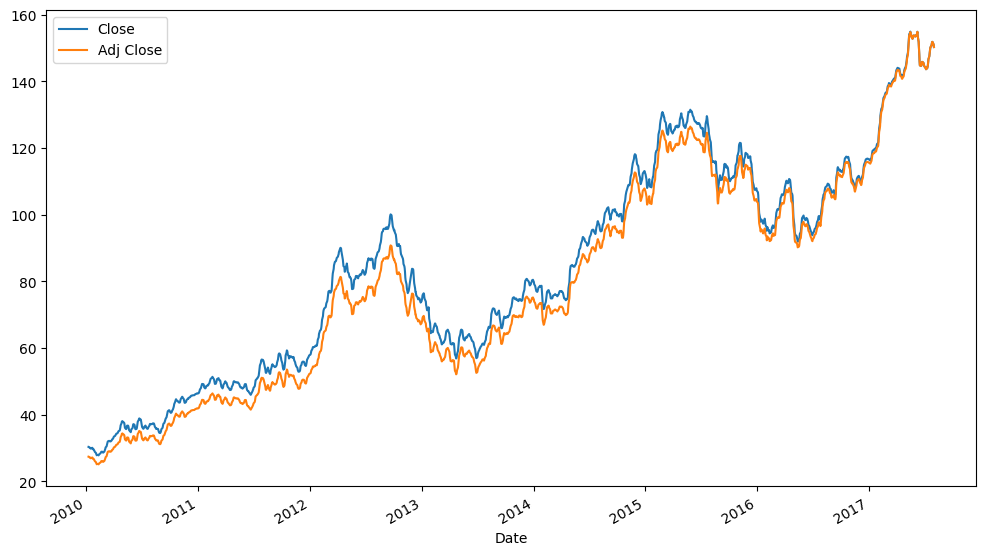

In [ ]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

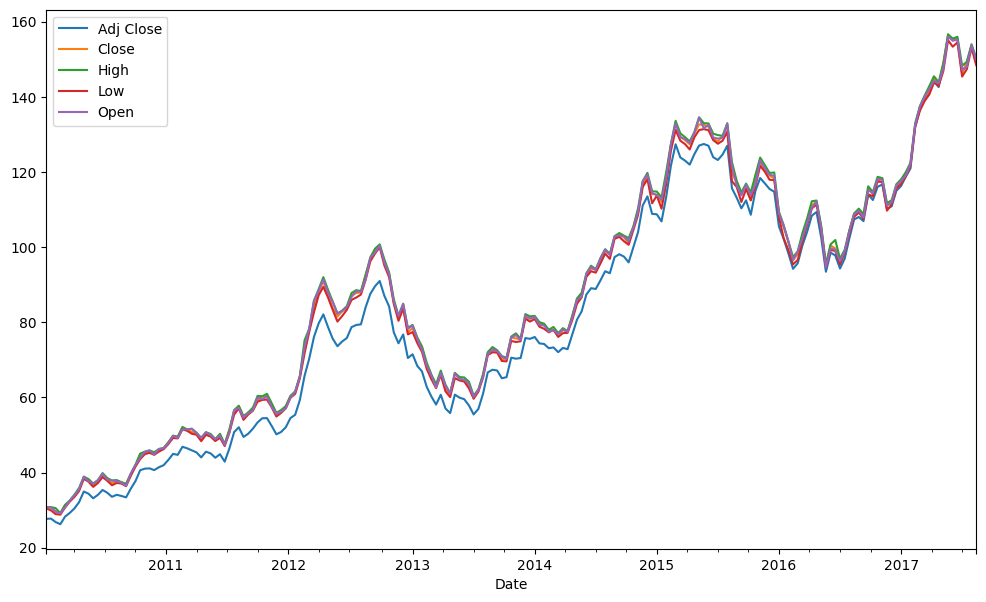

In [ ]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

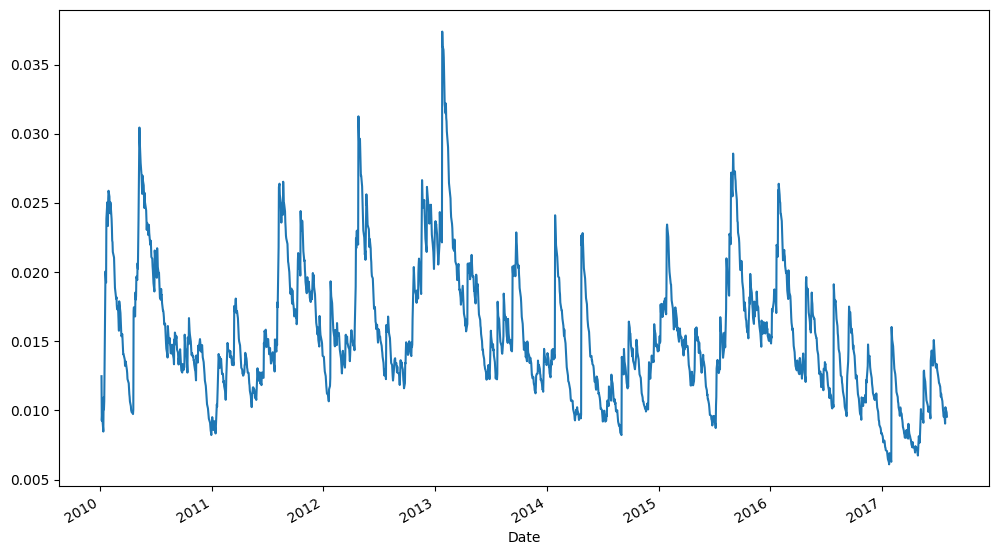

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

/content/demos/avocados.py:49: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  frame['Variety'].replace(


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

,0
Date,"datetime64[ns, UTC]"
Region,object
Variety,object
Organic,bool
Number of Stores,int64
Weighted Avg Price,float64
Low Price,float64
High Price,float64


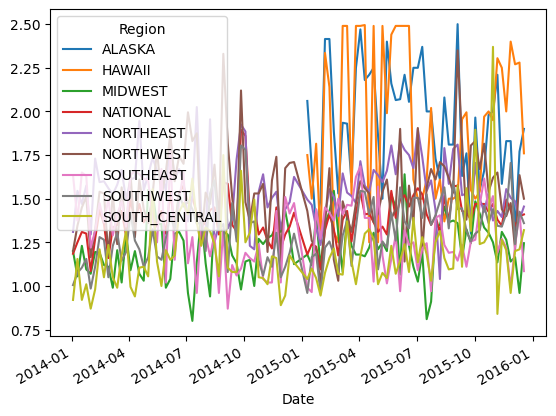

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)

    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

<ipython-input-11-9b1d8a2f0dc1>:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df


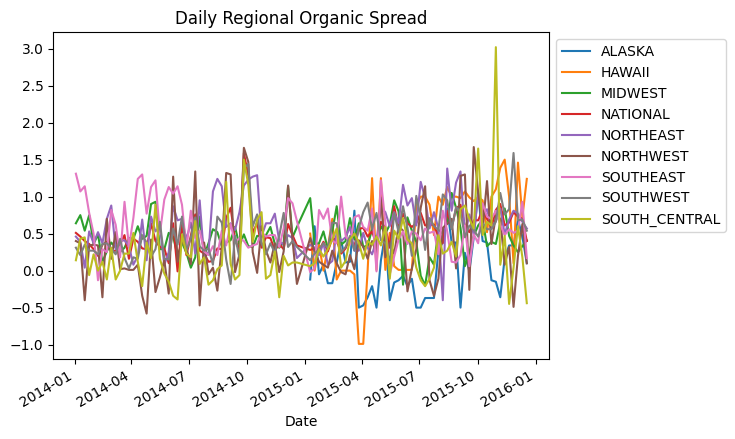

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

<ipython-input-11-9b1d8a2f0dc1>:17: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  df


Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


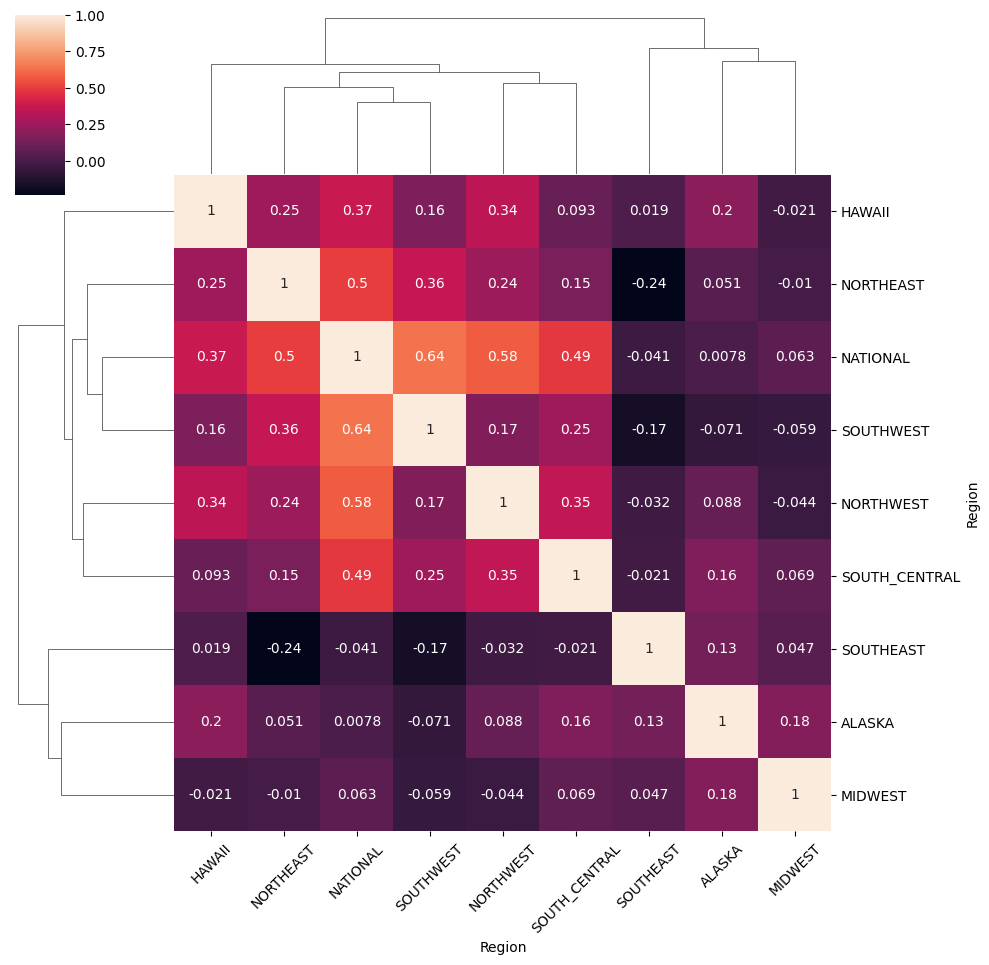

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# My Own Example "Real World" Data

In [19]:
import pandas as pd

exports= pd.read_csv('Exportaciones_agr_colas_no_tradicionales_y_tradicionales_20241112.csv')
exports.head()


,Partida,Descripcion Partida10 Dig,Tradición productos,Departamento,Pais,Año,Mes,Exportaciones en valor (Miles USD FOB),Exportaciones en volumen (Toneladas)
0,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2019,Abril,0,0
1,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2020,Febrero,0,0
2,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2022,Enero,0,0
3,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2022,Abril,0,0
4,101210000,"Caballos reproductores de raza pura, vivos",No tradicional,Antioquia,China,2023,Junio,0,0


In [20]:
# $ Lets check the types
exports.dtypes

,0
Partida,int64
Descripcion Partida10 Dig,object
Tradición productos,object
Departamento,object
Pais,object
Año,int64
Mes,object
Exportaciones en valor (Miles USD FOB),int64
Exportaciones en volumen (Toneladas),int64


In [33]:
# $ Create a dictionary to map Spanish month names to numbers
months = {
    'Enero': 1, 'Febrero': 2, 'Marzo': 3, 'Abril': 4,
    'Mayo': 5, 'Junio': 6, 'Julio': 7, 'Agosto': 8,
    'Septiembre': 9, 'Octubre': 10, 'Noviembre': 11, 'Diciembre': 12
}

# $ Map the 'Mes' column to numerical values
exports['Month_Num'] = exports['Mes'].map(months)

# $ Check for any unrecognized months
if exports['Month_Num'].isnull().any():
    print("Some months were not recognized. Please check the 'Mes' column.")
    print(exports[exports['Month_Num'].isnull()]['Mes'].unique())

# $ Create a 'Date' column combining 'Año' and 'Month_Num'
exports['Date'] = pd.to_datetime(dict(year=exports['Año'], month=exports['Month_Num'], day=1))

# $ Display the updated DataFrame
print(exports[['Año', 'Mes', 'Month_Num', 'Date']].head())

    Año      Mes  Month_Num       Date
0  2019    Abril          4 2019-04-01
1  2020  Febrero          2 2020-02-01
2  2022    Enero          1 2022-01-01
3  2022    Abril          4 2022-04-01
4  2023    Junio          6 2023-06-01


In [34]:
# $ Ensure that 'Exportaciones en valor (Miles USD FOB)' is numeric
exports['Exportaciones en valor (Miles USD FOB)'] = pd.to_numeric(
    exports['Exportaciones en valor (Miles USD FOB)'], errors='coerce'
)

# $ Fill any NaN values with 0
exports['Exportaciones en valor (Miles USD FOB)'] = exports['Exportaciones en valor (Miles USD FOB)'].fillna(0)

# $ Verify data types
print(exports.dtypes)

Partida                                            int64
Descripcion Partida10 Dig                         object
Tradición productos                               object
Departamento                                      object
Pais                                              object
Año                                                int64
Mes                                               object
Exportaciones en valor (Miles USD FOB)             int64
Exportaciones en volumen (Toneladas)               int64
Mes_Num                                            int64
Fecha                                     datetime64[ns]
Month_Num                                          int64
Date                                      datetime64[ns]
dtype: object


In [35]:
def _tradition_spread(group):
    # $ Check if the group has both traditional and non-traditional products
    if len(group.columns) != 2:
        # $ If not, return zeros
        return pd.Series(0.0, index=group.index)

    # $ Identify traditional product columns
    is_traditional = group.columns.get_level_values('Tradición productos') == 'Tradicional'

    # $ Extract traditional and non-traditional series
    traditional = group.loc[:, is_traditional].squeeze()
    non_traditional = group.loc[:, ~is_traditional].squeeze()

    # $ Calculate the difference
    diff = traditional - non_traditional
    return diff

In [36]:
def tradition_spread_by_department(df):
    # $ Aggregate data to ensure unique index
    df_agg = (
        df.groupby(['Date', 'Departamento', 'Tradición productos'])['Exportaciones en valor (Miles USD FOB)']
        .sum()
        .unstack(level=['Departamento', 'Tradición productos'])
    )

    # $ Forward fill missing values
    df_agg = df_agg.sort_index().ffill()

    # $ Apply the tradition spread function
    result = df_agg.groupby(level='Departamento', axis=1).apply(_tradition_spread)
    return result

In [37]:
# $ Calculate the spread by department
spread_department = tradition_spread_by_department(exports)

# $ Display the first few rows of the spread
print(spread_department.head())

Departamento  Amazonas  Antioquia  Arauca  Atlántico   Bogotá  Bolívar  \
Date                                                                     
2019-01-01         0.0   114557.0     NaN   -16016.0  22575.0  -6214.0   
2019-02-01         0.0    73757.0     NaN   -11840.0  39866.0  -6301.0   
2019-03-01         0.0    72263.0     NaN   -21301.0  37171.0  -7038.0   
2019-04-01         0.0   106405.0     NaN   -19288.0  23757.0 -11066.0   
2019-05-01         0.0   121795.0     NaN   -26426.0  53929.0  -6778.0   

Departamento  Boyacá   Caldas  Caquetá  Casanare  ...  Putumayo  Quindío  \
Date                                              ...                      
2019-01-01    -200.0  45503.0      0.0       NaN  ...       NaN  30752.0   
2019-02-01    -260.0  22316.0      0.0       NaN  ...       NaN  20683.0   
2019-03-01    -323.0  23052.0      0.0       NaN  ...       NaN  21340.0   
2019-04-01    -210.0  14790.0      0.0       2.0  ...       NaN  19452.0   
2019-05-01    -209.0  203

<ipython-input-36-29badd98fbd0>:13: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  result = df_agg.groupby(level='Departamento', axis=1).apply(_tradition_spread)


<Figure size 1400x700 with 0 Axes>

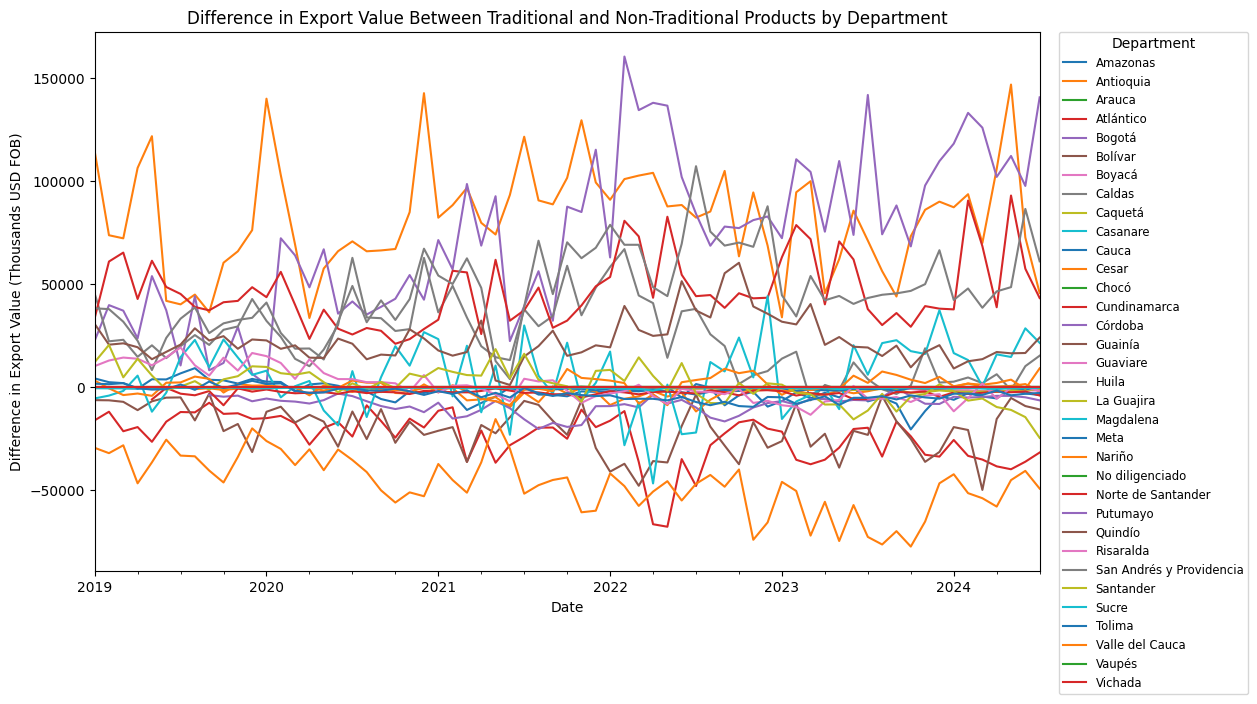

In [41]:
# $ Plot the spread over time
plt.figure(figsize=(14, 7))

# $ Plot the spread
ax = spread_department.plot(figsize=(14, 7))

# $ Customize the plot
plt.title("Difference in Export Value Between Traditional and Non-Traditional Products by Department")
plt.xlabel("Date")
plt.ylabel("Difference in Export Value (Thousands USD FOB)")

# $ Move the legend outside the plot
ax.legend(title='Department', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='small', borderaxespad=0)

# $ Adjust the plot area to make space for the legend
plt.subplots_adjust(right=0.8)

# $ Show the plot
plt.show()

In [47]:
# $ Identify departments with constant values (zero variance)
constant_departments = spread_department.columns[spread_department.nunique() <= 1]

# $ Remove these departments from the spread data
spread_department_filtered = spread_department.drop(columns=constant_departments)

# $ Calculate the correlation matrix without constant departments
spread_correlation = spread_department_filtered.corr()

# $ Fill NaN values with zeros (use with caution)
spread_correlation_clean = spread_correlation.fillna(0)


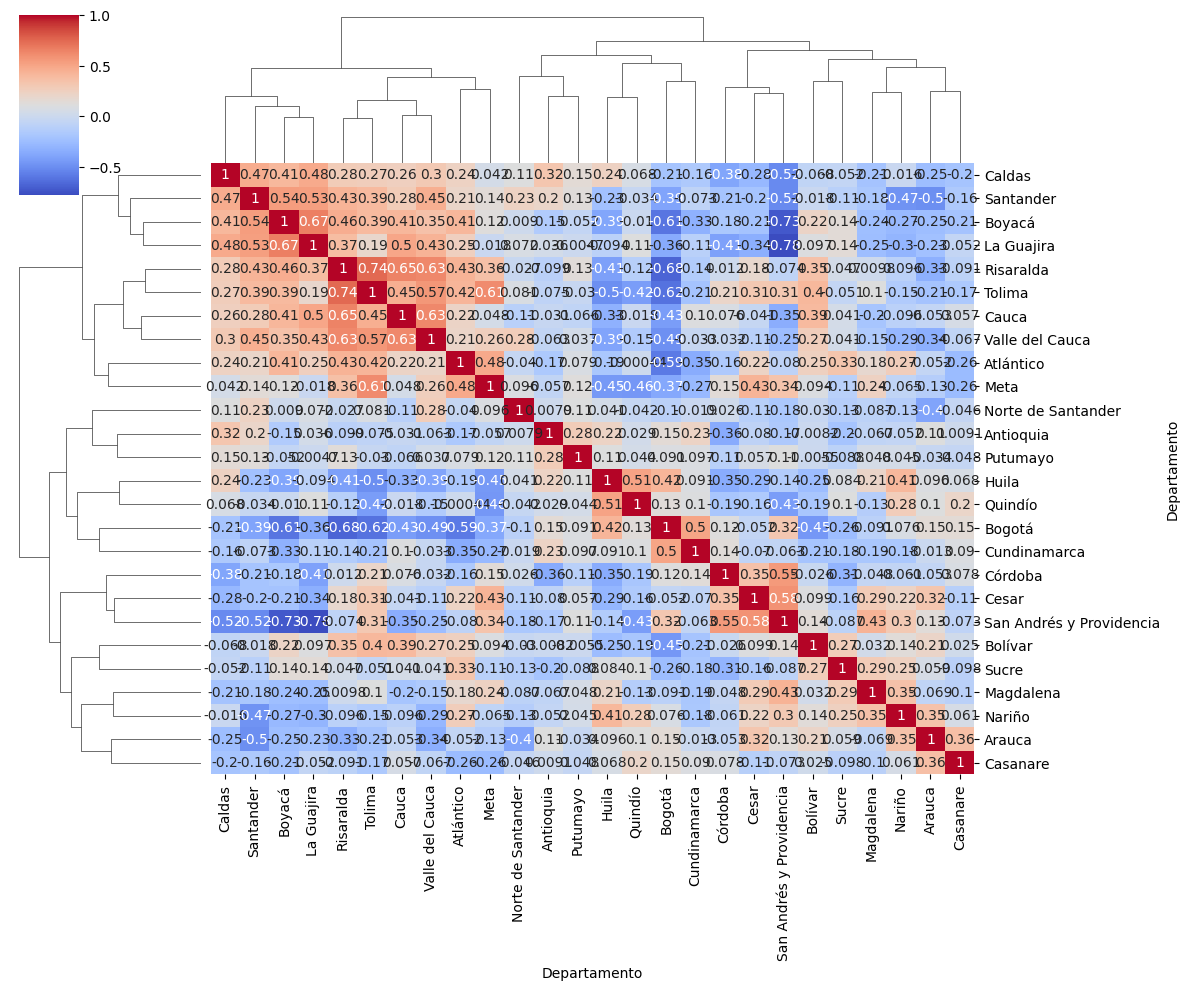

In [48]:
# $ Visualize the correlation matrix using a heatmap
sns.clustermap(spread_correlation_clean, annot=True, figsize=(12, 10), cmap='coolwarm')

# $ Show the plot
plt.show()

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!